In [1]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('./dataFolder/DLTdv8_data_MV_m1xypts.csv')

In [3]:
df.head()

pt1_cam1_X  pt1_cam1_Y  pt2_cam1_X  pt2_cam1_Y  pt3_cam1_X  pt3_cam1_Y  \
0  388.078376  381.614068  372.227746  188.424715  381.619192  323.795071   
1  386.810000  386.980000  372.970000  188.000000  381.348241  327.728714   
2  383.100000  379.100000  373.950000  188.010000  378.548415  321.217857   
3  379.238602  381.156274  374.930000  188.010000  377.155303  323.250858   
4  378.700000  379.270000  374.940000  188.010000  376.495312  316.354012   

   pt4_cam1_X  pt4_cam1_Y  pt5_cam1_X  pt5_cam1_Y  pt6_cam1_X  pt6_cam1_Y  \
0  380.238266  277.537139  381.059690  314.190856  381.198874  307.238159   
1  379.416841  278.019424  380.405303  320.557345  380.743042  310.449771   
2  379.950000  278.000000  378.337121  315.709023  378.463881  309.847593   
3  376.815665  278.019424  377.226377  314.914284  378.008049  309.245416   
4  377.010000  278.000000  377.363281  312.985141  376.640553  306.635981   

   pt7_cam1_X  pt7_cam1_Y  pt8_cam1_X  pt8_cam1_Y  pt9_cam1_X  pt9_cam1_Y  
0  381.084916  300.212757  380.799242  293.442655  380.405303  287.157793  
1  380.743042  302.621466  380.306818  295.597465  380.208333  288.594333  
2  378.691797  301.216386  379.125000  295.238330  379.223485  286.080388  
3  377.096385  301.216386  377.253788  295.597465  376.859848  287.696495  
4  376.754511  300.614209  376.465909  294.699627  376.958333  287.157793

In [4]:
key = {'pt1':'body',
      'pt2':'nectary',
      'pt3':'prob_base',
      'pt4':'prob_mid',
      'pt5':'prob_1',
       'pt6':'prob_2',
       'pt7':'prob_3',
       'pt8':'prob_4',
       'pt9':'prob_5'}

In [5]:
col = []
for item in df.columns:
    a,b, c = item.split('_')
    new_a = key[a]
    new_c = c
    c = new_a + '_' + new_c
    col.append(c)

In [6]:
df.columns = col

In [7]:
df.head()

body_X      body_Y   nectary_X   nectary_Y  prob_base_X  prob_base_Y  \
0  388.078376  381.614068  372.227746  188.424715   381.619192   323.795071   
1  386.810000  386.980000  372.970000  188.000000   381.348241   327.728714   
2  383.100000  379.100000  373.950000  188.010000   378.548415   321.217857   
3  379.238602  381.156274  374.930000  188.010000   377.155303   323.250858   
4  378.700000  379.270000  374.940000  188.010000   376.495312   316.354012   

   prob_mid_X  prob_mid_Y    prob_1_X    prob_1_Y    prob_2_X    prob_2_Y  \
0  380.238266  277.537139  381.059690  314.190856  381.198874  307.238159   
1  379.416841  278.019424  380.405303  320.557345  380.743042  310.449771   
2  379.950000  278.000000  378.337121  315.709023  378.463881  309.847593   
3  376.815665  278.019424  377.226377  314.914284  378.008049  309.245416   
4  377.010000  278.000000  377.363281  312.985141  376.640553  306.635981   

     prob_3_X    prob_3_Y    prob_4_X    prob_4_Y    prob_5_X    prob_5_Y  
0  381.084916  300.212757  380.799242  293.442655  380.405303  287.157793  
1  380.743042  302.621466  380.306818  295.597465  380.208333  288.594333  
2  378.691797  301.216386  379.125000  295.238330  379.223485  286.080388  
3  377.096385  301.216386  377.253788  295.597465  376.859848  287.696495  
4  376.754511  300.614209  376.465909  294.699627  376.958333  287.157793

In [9]:
df.to_csv('./dataFolder/MV_m1_points.csv', index = False)

In [8]:
key_color = {'body': 'lime',
             'nectary': 'lime',
             'prob_base': 'darkred',
             'prob_mid': 'mistyrose',
             'prob_1': 'firebrick',
             'prob_2': 'red',
             'prob_3': 'indianred',
             'prob_4': 'salmon',
             'prob_5': 'lightsalmon'}

In [12]:
tt= []
for k in key_color.keys():
    tt_ = matplotlib.colors.to_rgb(key_color[k])
    tt_new = [int(i * 255) for i in tt_]
#     tt_ = tt_.*2
    tt.append(tt_new)

In [14]:
tt

[[0, 255, 0],
 [0, 255, 0],
 [139, 0, 0],
 [255, 228, 225],
 [178, 34, 34],
 [255, 0, 0],
 [205, 92, 92],
 [250, 128, 114],
 [255, 160, 122]]

In [15]:
# import matplotlib.pyplot as plt
import cv2 as cv2

In [16]:
path_video = r'C:\Users\Tanvi\Dropbox\Plifer_BehvaiorTrackingData\MVtracking\MV_video/'
videoname = 'MV_m1_130802_tracked.mp4'

In [17]:
cap = cv2.VideoCapture(path_video + videoname)
video_fps = cap.get(cv2.CAP_PROP_FPS),
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(video_fps, total_frames, height, width)

(25.0,) 1000.0 602.0 702.0


In [18]:
ff = 0

In [26]:
for ff in [50]:
    cap.set(cv2.CAP_PROP_POS_FRAMES, ff)
    ret, frame = cap.read()
#     plt.imshow(frame)
    for k in key:
        coord = key[k]
        x_ = df.loc[ff, key[k] + '_X']
        y_ = df.loc[ff, key[k] + '_Y']
        ii = 0
        overlay = cv2.circle(frame, (x_,y_), 10, tt[ii],-1)
        ii+=1

TypeError: integer argument expected, got float

(450.0, 150.0)

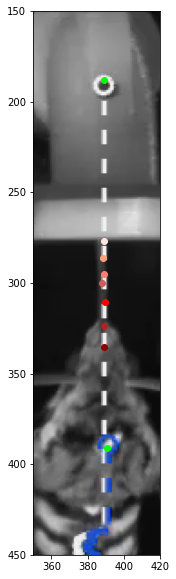

In [70]:
f = plt.figure(figsize = (6,10))

for ff in [50]:
    cap.set(cv2.CAP_PROP_POS_FRAMES, ff)
    ret, frame = cap.read()
    plt.imshow(frame)
    for k in key:
        coord = key[k]
        plt.scatter(df.loc[ff, key[k] + '_X'], df.loc[ff, key[k] + '_Y'],
                   color = key_color[key[k]])

plt.xlim([350,420])
plt.ylim([450, 150])

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


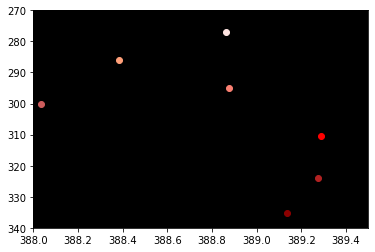

In [80]:
for k in key:
    coord = key[k]
    plt.scatter(df.loc[ff, key[k] + '_X'], df.loc[ff, key[k] + '_Y'], color = key_color[key[k]])
    
plt.xlim([388,389.5])
plt.ylim([340, 270])
ax = plt.axes()
ax.set_facecolor("black")

In [27]:
def reorder_columns(string):
    list_of_coord = list([column for column in df.columns if string in column and 'prob' in column])
    myorder = [0, 2, 3, 4, 5, 6, 1]
    mylist = [list_of_coord[i] for i in myorder]
    return(mylist)

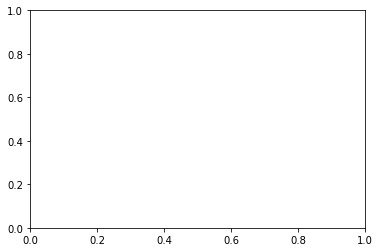

In [66]:
f = plt.figure()

for r, data in X_arr.iterrows():
    
    x = data.values
    y = Y_arr.loc[r, :].values
    xx_ = new_x[r]
    yy_ = new_y[r]
    
    plt.plot(x,y, 'ro')
    plt.plot(xx_, yy_, 'r-')
    ax = f.axes
    ax[0].invert_yaxis()
    plt.savefig(os.path.join('./dataFolder/computeInterpolation/', str(r).zfill(3) + '.png'))
    plt.cla()

In [ ]:
# from scipy import signal

# interpol_order = 2 # order for polynomial interpolation

# # parameters for the savitzky-golay filter
# savgol_win = 11
# savgol_polyorder = 3

# new_x = signal.savgol_filter(X_arr,
#                               window_length=savgol_win,
#                               polyorder=savgol_polyorder,
#                               axis=0)

# new_y = signal.savgol_filter(Y_arr,
#                               window_length=savgol_win,
#                               polyorder=savgol_polyorder,
#                               axis=0)

# plt.plot(x,y, 'ro')
# plt.plot(x, y, 'r-')